# Ontology-based functional group detection

In [1]:
import Pkg
Pkg.activate("..")
using GraphMol

- `drawatomindex!` adds atom index to the molecular image canvas.

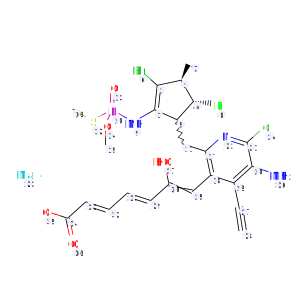

In [3]:
MOL_DIR = joinpath(dirname(@__FILE__), "..", "assets", "test")
mol = sdftomol(open(joinpath(MOL_DIR, "demo.mol")))

draw2d_annot!(mol)
canvas = SvgCanvas()
draw2d!(canvas, mol)
drawatomindex!(canvas, mol)
mol_svg = tosvg(canvas, 300, 300)

display("image/svg+xml",  mol_svg)

- `functionalgroup!` add functional group annotations to VectorMol object

In [5]:
functionalgroup!(mol)
fg = mol.annotation[:FunctionalGroup]
fgset = fg.nodeset
for (k, v) in fgset
    if !isempty(v)
        nodes = [sort(collect(s)) for s in v]
        println("Group: $(string(k)): ", nodes...)
    end
end

Group: Triene: [25, 26, 29, 31, 32, 33]
Group: Carboxyl: [34, 35, 36]
Group: Arylchloride: [21, 24]
Group: Alkyne: [27, 28]
Group: Alkylhalide: [4, 8][2, 6][3, 7]
Group: Pyridine: [17, 18, 19, 20, 21, 22]
Group: Alkylbromide: [2, 6]
Group: SecAlcohol: [26, 37][34, 35]
Group: SixMemberedRing: [17, 18, 19, 20, 21, 22]
Group: FiveMemberedRing: [1, 2, 3, 4, 5]
Group: Arylhalide: [21, 24]
Group: AromaticNitrogen: [17, 21, 22]
Group: Diene: [29, 31, 32, 33][25, 26, 29, 31]
Group: AromaticAmine: [20, 30]
Group: Carbonyl: [34, 36]
Group: Alkylfluoride: [4, 8]
Group: Alcohol: [26, 37][34, 35]
Group: Thiophosphate: [10, 12, 14][10, 12, 13]
Group: Thiophosphoramidate: [9, 10, 12, 13, 14]
Group: Alkene: [25, 26][29, 31][1, 2][32, 33]
Group: Alkyliodoide: [3, 7]


- Extract the largest components based on ontology graph

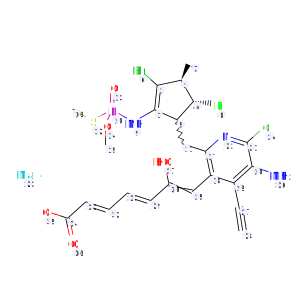

Group: Triene: [25, 26, 29, 31, 32, 33]
Group: Carboxyl: [34, 35, 36]
Group: Arylchloride: [21, 24]
Group: FiveMemberedRing: [1, 2, 3, 4, 5]
Group: Alkylbromide: [2, 6]
Group: Alkylfluoride: [4, 8]
Group: Thiophosphoramidate: [9, 10, 12, 13, 14]
Group: Alkyne: [27, 28]
Group: Alkyliodoide: [3, 7]
Group: Alkene: [1, 2]
Group: Pyridine: [17, 18, 19, 20, 21, 22]
Group: SecAlcohol: [26, 37]
Group: AromaticAmine: [20, 30]


In [6]:
fgset2 = largestcomponents(fg)
display("image/svg+xml",  mol_svg)
for (k, v) in fgset2
    if !isempty(v)
        nodes = [sort(collect(s)) for s in v]
        println("Group: $(string(k)): ", nodes...)
    end
end